<font color=#85C1E9 size=8>**Predictive Model**

<font color=#858FE9 size=4>**Machine learning-based Chagas disease diagnostic tool with proteomic profiles**
    
<font color=#9085E9 size=3>**Proyecto de grado para optar por el titulo de Quimica** 

<font color=#AD85E9 size=3>**Yenny Velandia**

<font color=#858FE1 size=6>**Samples resulting from filtration less than 3kDa**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA

<font color=#AD85E9 size=4>**Spectrum reading and Loading of Dataset**

In [2]:
import glob
fn = []
all_spectra = pd.DataFrame()

for f in glob.glob("./all spectra/*.txt"):
    df = pd.read_csv(f, header=None, delimiter=' ' )
    all_spectra = pd.concat([all_spectra, df], axis=1)
    fn.append(f) 
Datamz = all_spectra[0] # realciones m/z
Data = all_spectra[1] # Intensidades

<font color=#AD85E9 size=3>**Inspección**

In [3]:
Data.columns=range(Data.shape[1]) # Aquí le ponemos indices ordenados a las columnas de las intensidades
Data

Datamz.tail(10241) 

#everything has signals

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12799,2862.608,2862.608,2862.608,2862.608,2862.608,2862.608,2862.608,2862.608,2862.608,2862.608,...,2862.608,2862.608,2862.608,2862.608,2862.608,2862.608,2862.608,2862.608,2862.608,2862.608
12800,2862.851,2862.851,2862.851,2862.851,2862.851,2862.851,2862.851,2862.851,2862.851,2862.851,...,2862.851,2862.851,2862.851,2862.851,2862.851,2862.851,2862.851,2862.851,2862.851,2862.851
12801,2863.094,2863.094,2863.094,2863.094,2863.094,2863.094,2863.094,2863.094,2863.094,2863.094,...,2863.094,2863.094,2863.094,2863.094,2863.094,2863.094,2863.094,2863.094,2863.094,2863.094
12802,2863.337,2863.337,2863.337,2863.337,2863.337,2863.337,2863.337,2863.337,2863.337,2863.337,...,2863.337,2863.337,2863.337,2863.337,2863.337,2863.337,2863.337,2863.337,2863.337,2863.337
12803,2863.580,2863.580,2863.580,2863.580,2863.580,2863.580,2863.580,2863.580,2863.580,2863.580,...,2863.580,2863.580,2863.580,2863.580,2863.580,2863.580,2863.580,2863.580,2863.580,2863.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23035,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,...,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533
23036,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,...,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882
23037,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,...,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230
23038,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,...,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578


<font color=#AD85E9 size=3>**m/z**

In [4]:
Dsna=Datamz[0:23040]
Dsna

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,598.375,598.375,598.375,598.375,598.375,598.375,598.375,598.375,598.375,598.375,...,598.375,598.375,598.375,598.375,598.375,598.375,598.375,598.375,598.375,598.375
1,598.486,598.486,598.486,598.486,598.486,598.486,598.486,598.486,598.486,598.486,...,598.486,598.486,598.486,598.486,598.486,598.486,598.486,598.486,598.486,598.486
2,598.597,598.597,598.597,598.597,598.597,598.597,598.597,598.597,598.597,598.597,...,598.597,598.597,598.597,598.597,598.597,598.597,598.597,598.597,598.597,598.597
3,598.708,598.708,598.708,598.708,598.708,598.708,598.708,598.708,598.708,598.708,...,598.708,598.708,598.708,598.708,598.708,598.708,598.708,598.708,598.708,598.708
4,598.819,598.819,598.819,598.819,598.819,598.819,598.819,598.819,598.819,598.819,...,598.819,598.819,598.819,598.819,598.819,598.819,598.819,598.819,598.819,598.819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23035,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,...,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533
23036,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,...,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882
23037,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,...,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230
23038,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,...,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578


In [5]:
D=Dsna.isnull().any()

In [6]:
df = D[D[0]==True]
df

Series([], dtype: bool)

<font color=#AD85E9 size=3>**Intensities**

In [7]:
Dataint=Data[0:23040]
Dataint

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,235
0,267,234,776,823,872,1121,-6,92,923,451,...,768,163,763,383,172,166,1213,1290,202,157
1,381,415,896,879,999,1279,223,171,1018,546,...,910,183,815,464,316,331,1221,1390,202,166
2,588,535,994,939,1025,1440,422,323,1048,656,...,932,221,796,497,369,386,1228,1484,285,115
3,735,561,910,882,854,1322,626,469,818,636,...,784,196,743,340,316,325,1233,1571,146,173
4,803,432,814,856,548,1134,539,492,807,535,...,519,136,588,302,229,235,1236,1653,61,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23035,9,15,-5,11,-6,-6,2,12,-6,9,...,-2,7,3,5,11,11,12,4,13,7
23036,7,14,-2,14,0,23,-2,12,2,20,...,8,3,-1,0,9,8,12,4,14,12
23037,15,4,3,14,17,5,6,6,-12,19,...,5,11,1,5,-3,-2,13,5,17,14
23038,-1,1,-4,29,2,7,18,6,-1,10,...,8,-3,-6,11,-3,-3,13,5,31,1


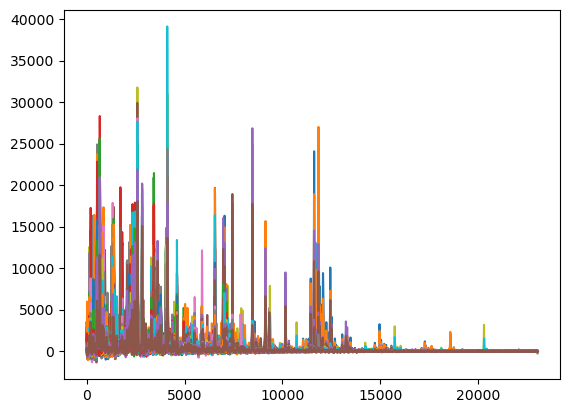

In [8]:
plt.plot(Dataint);

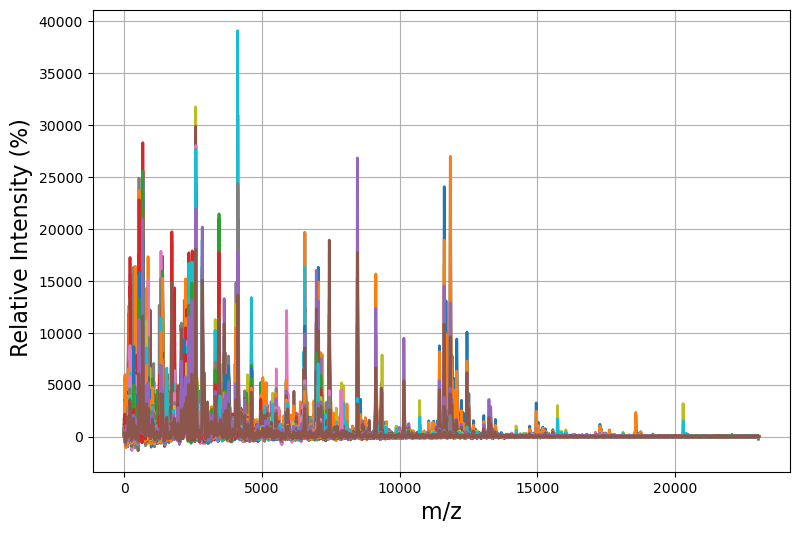

In [9]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rcParams["font.family"] = 'Times New Roman'
ax.xaxis.grid()
ax.yaxis.grid()
ax.plot(Dataint, lw=2)
ax.set_xlabel('m/z',  fontsize=16)
ax.set_ylabel(' Relative Intensity (%)', fontsize=16)
plt.savefig('espectros de masas.png')
plt.show()

In [10]:
len(Dataint.columns)

236

In [11]:
C = pd.read_excel('clasificacion.xlsx')
C

,Number,clasification,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
231,231,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,232,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,233,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,234,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
Y= C[["clasification"]]
Y1=Y.set_axis(['Clase'], axis=1)
Y1

,Clase
0,A
1,A
2,N
3,N
4,S
...,...
231,A
232,N
233,N
234,S


<font color=#858FE1 size=6>**Principal Component Analysis (PCA)**
    
<font color=#AD85E9 size=3>**Unsupervised learning**

In [13]:
#data normalization
from sklearn.preprocessing import StandardScaler, Normalizer
scaler=StandardScaler()

scaler.fit(Dataint) # calculo la media para poder hacer la transformacion
x_scaled=scaler.transform(Dataint)# Ahora si, escalo los datos y los normalizo

In [14]:
valt=Dataint.T

valtn = preprocessing.normalize(valt, norm='l1')# Normaliza los datos
# Iniciamos el desarrollo del PCA en este caso con 10 componentes
pca=PCA(n_components=10) # Otra opción es hacer pca hasta obtener un mínimo explicado ej.: pca=PCA(.85)
pca1=pca.fit(x_scaled.T) # obtener los componentes principales
datos_pca=pca.transform(x_scaled.T) # convertimos nuestros datos con las nuevas dimensiones de PCA, scores



# Esta celda es para observar la varianza explicada con 5 componentes, se podría variar a los que se quisiese
print("shape of datos_pca", datos_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:10]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada
datos_pca1 = pd.DataFrame(datos_pca) # Convierte los datos pca en un DataFrame
datos_pca1=pd.concat([datos_pca1, Y1] ,axis=1) # Se agrega la columna del tipo de muestra

shape of datos_pca (236, 10)
[0.28667401 0.11023705 0.08176251 0.07480978 0.06549369 0.0445296
 0.03904263 0.03676679 0.0232983  0.02065167]
suma: 0.7832660305108794


In [15]:
scores_df = pd.DataFrame(datos_pca, columns = [f"PC{i+1}" for i in range(datos_pca.shape[1])])
scores_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,29.410385,-23.123084,42.882846,-7.151239,-19.041101,-15.682061,24.079692,20.195048,-4.472833,-2.559562
1,-3.518009,-28.237275,27.074341,-9.170726,-13.748236,-16.431063,21.333752,4.153629,-9.482735,2.270429
2,34.556415,-21.604162,-32.645251,-15.742305,2.193066,-21.736075,-10.716339,2.518625,-9.435843,-12.287719
3,-26.753048,-27.426063,-27.410647,0.213840,-8.324547,-18.324358,-18.948341,22.685727,-12.135569,-15.713979
4,-24.098123,-16.630922,-40.284457,22.352345,-12.595149,-14.122556,12.858122,-13.102087,13.549774,16.334443


In [16]:
variancia_explicada = np.insert(expl, 0, 0)
variancia_acomulada = np.cumsum(np.round(variancia_explicada, decimals=3))
pc_df = pd.DataFrame([''] + [f"PC{i+1}" for i in range(datos_pca.shape[1])], columns =['PC'])
variancia_explicada_df = pd.DataFrame(variancia_explicada, columns=["Variancia Explicada"])
variancia_acomulada_df = pd.DataFrame(variancia_acomulada, columns=['Variancia Acumulada']
)
df_variancia_explicada = pd.concat([pc_df, variancia_explicada_df, variancia_acomulada_df], axis =1)
df_variancia_explicada 

,PC,Variancia Explicada,Variancia Acumulada
0,,0.000000,0.000
1,PC1,0.286674,0.287
2,PC2,0.110237,0.397
3,PC3,0.081763,0.479
4,PC4,0.074810,0.554
5,PC5,0.065494,0.619
6,PC6,0.044530,0.664
7,PC7,0.039043,0.703
8,PC8,0.036767,0.740
9,PC9,0.023298,0.763


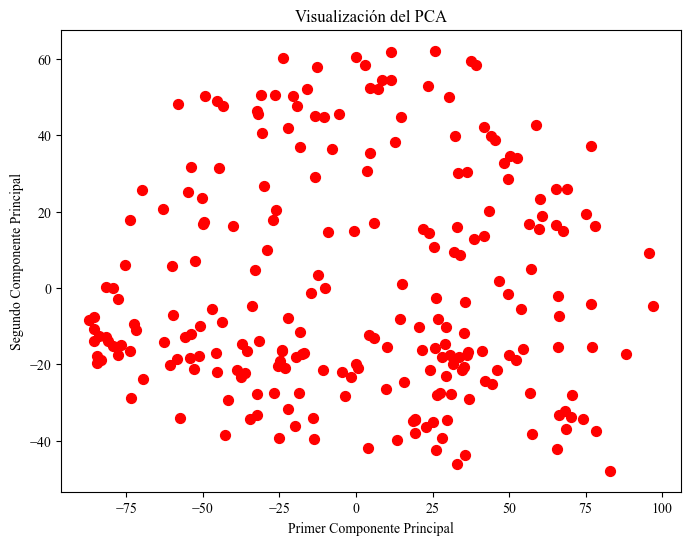

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(datos_pca1.iloc[:, 0], datos_pca1.iloc[:, 1], c='red', s=50)
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Visualización del PCA')
plt.savefig('PCA.png');
plt.show()

In [18]:
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import show

TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"

colormap = {'A': 'yellow', 'N':'blue' , 'S': 'green', }
colors = [colormap[x] for x in Y1['Clase']]

#datos_pca1 = pd.DataFrame(data={'PCA1': X_pca[:,0], 'PCA2': X_pca[:,1]})

p = figure(title='PCA', width=600, height=400,
           x_axis_label='PCA 1', y_axis_label='PCA 2', toolbar_location="above", tools=TOOLS)
p.grid.grid_line_alpha=0.3
p.circle(datos_pca1[0], datos_pca1[1], color=colors, size=10, alpha=0.6)

show(p)

<font color=#EF5DCC size=9>**Supervised Learning**

<font color=#AD85E9 size=6>**Support vector machine (SVM)**
    
<font color=#858FE1 size=3>**supervised learning**

<font color=E3B4F2 size=3>**Model 80:20**

In [19]:
#Aquí se convierten las variables en números ordinales A es 0, N es 1 y S es 2

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

encoder = OrdinalEncoder()
encoder.fit(Y1[['Clase']])
Y1_code = encoder.transform (Y1[['Clase']])
Y1_code = pd.DataFrame(Y1_code)
Y1_code

,0
0,0.0
1,0.0
2,1.0
3,1.0
4,2.0
...,...
231,0.0
232,1.0
233,1.0
234,2.0


In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV #permite realizar una búsqueda exhaustiva en un conjunto de parámetros especificados por el usuario para encontrar los mejores hiperparámetros del modelo.
from sklearn.metrics import accuracy_score #permite calcular la precisión de un modelo de clasificación

X_tr2, X_te2, y_tr2, y_te2 = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size   = 0.8, random_state = 12, shuffle = True)

modelo2 = SVC(C = 40, kernel = 'rbf', random_state=200)
modelo2.fit(X_tr2, y_tr2)


SVC(C=40, random_state=200)

In [21]:
# Predictions

predicciones = modelo2.predict(X_te2)
predicciones

array([0., 0., 1., 1., 0., 2., 2., 2., 1., 2., 2., 0., 2., 1., 0., 1., 2.,
       0., 2., 0., 2., 2., 0., 2., 1., 2., 0., 1., 0., 1., 1., 2., 0., 2.,
       2., 0., 1., 2., 1., 1., 0., 2., 0., 2., 0., 2., 2., 0.])

<font color=#AD85E9 size=3>**Metrics for the confusion matrix**
    

In [22]:
from sklearn.linear_model import LinearRegression

# Fit the model to the training data
clf = LinearRegression().fit(X_tr2, y_tr2)

# Print the weight coefficients
print(clf.coef_)

[ 1.06573079e-03 -8.36590284e-05 -1.10906869e-03 ... -2.13317066e-04
 -3.26745168e-04 -5.84073552e-04]


In [23]:
def opt_svc(X, y, xt, rs):
    
    # Defining PLS and the number of components
    
    svc = SVC(C = 40, kernel = 'rbf', random_state=123)
    svc.fit(X, y)
    y_pred = svc.predict(x_test)
    
    # Metric calculation
    
    ex = accuracy_score(y_true = y_test, y_pred = y_pred, normalize = True)
        
    return (y_pred, ex)

In [24]:
# Testing with 30 components

exs = []
yps = []
rss = []
arr_rs = np.arange(1, 200)

for rs in arr_rs:
    x_train, x_test, y_train, y_test = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size   = 0.8, random_state = rs, shuffle = True)
    y_pred, ex = opt_svc(x_train, y_train, x_test, rs)
    rss.append(rs)
    yps.append(y_pred)
    exs.append(ex)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size   = 0.8, random_state = rss[np.argmax(exs)], shuffle = True)

# Creación del modelo SVM 

svc1 = SVC(C = 40, kernel = 'rbf', random_state=123)
svc1.fit(x_train, y_train)
y_pred_svc = svc1.predict(x_test)
ex_svc = accuracy_score(y_true = y_test, y_pred = y_pred_svc, normalize = True)
ex_svc

1.0

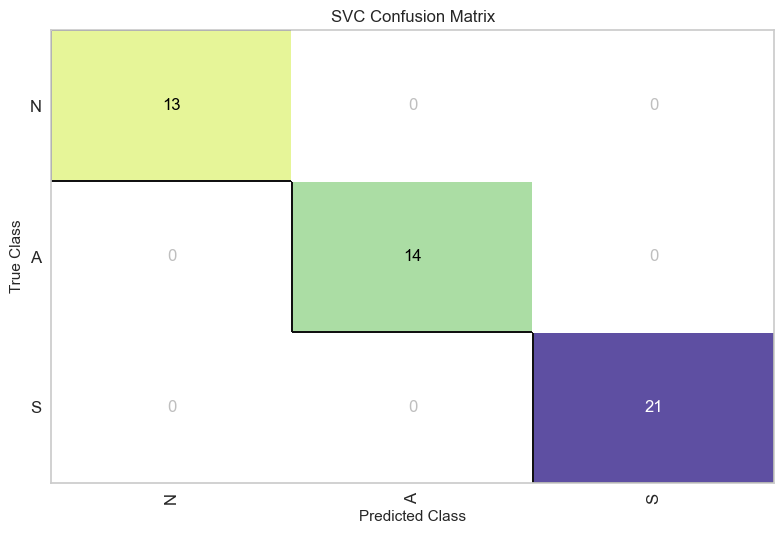

              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000        13
         1.0     1.0000    1.0000    1.0000        14
         2.0     1.0000    1.0000    1.0000        21

    accuracy                         1.0000        48
   macro avg     1.0000    1.0000    1.0000        48
weighted avg     1.0000    1.0000    1.0000        48



<Figure size 800x550 with 0 Axes>

In [26]:
from yellowbrick.classifier import confusion_matrix
from tabulate import tabulate as tabulate_fn

confusion_matrix(
    SVC(C = 40, kernel = 'rbf', random_state=123),
    x_train, y_train, x_test, y_test,
    classes=['N', 'A', 'S'], cmap='Spectral'
) 

plt.savefig('CM_SVC.png');
plt.tight_layout();

from sklearn import metrics
print(metrics.classification_report(y_test,y_pred_svc, digits = 4))

In [27]:
np.max(exs), rss[np.argmax(exs)]

(1.0, 42)

<font color=#D63BB0 size=6>**Nu-Support Vector Classification (NuSVM)**

In [28]:
from sklearn.svm import NuSVC

X_tr2, X_te2, y_tr2, y_te2 = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size = 0.8, random_state = 12, shuffle = True)

modeloNu = NuSVC(nu=0.1, gamma='auto')
modeloNu.fit(X_tr2, y_tr2)

NuSVC(gamma='auto', nu=0.1)

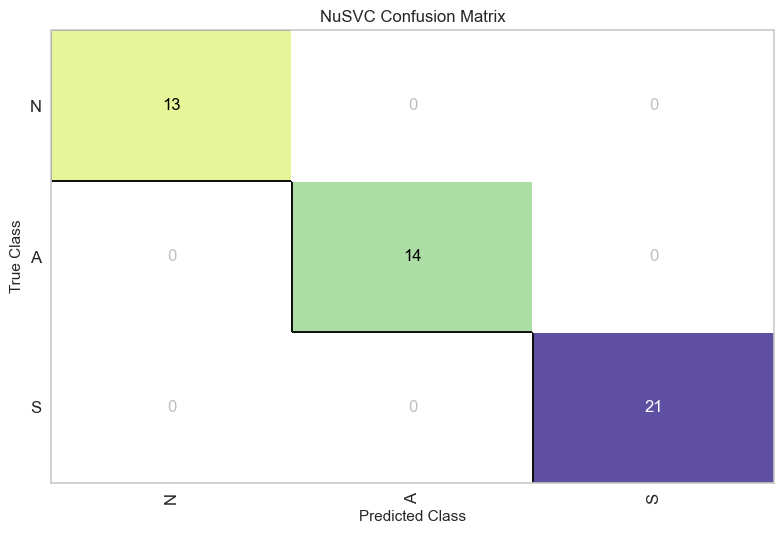

              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000        13
         1.0     1.0000    1.0000    1.0000        14
         2.0     1.0000    1.0000    1.0000        21

    accuracy                         1.0000        48
   macro avg     1.0000    1.0000    1.0000        48
weighted avg     1.0000    1.0000    1.0000        48



<Figure size 800x550 with 0 Axes>

In [29]:
from yellowbrick.classifier import confusion_matrix
confusion_matrix(
   NuSVC(nu=0.1, gamma='auto'),
    x_train, y_train, x_test, y_test,
    classes=['N', 'A', 'S'], cmap='Spectral'
) 
plt.savefig('CM_NuSVC.png')
plt.tight_layout();

#Predicción con base a las variables ya entrenadas

y_predNu = modeloNu.predict(x_test)

#Generación de soporte

from sklearn import metrics
print(metrics.classification_report(y_test, y_predNu, digits = 4))


<font color=#D63BB0 size=6>**Linear Support Vector Classification**

In [30]:
from sklearn.svm import LinearSVC


x_train, x_test, y_train, y_test = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size   = 0.8, random_state = rss[np.argmax(exs)], shuffle = True)

# Creación del modelo linearSVM 

LiSVC = LinearSVC( )
LiSVC.fit(x_train, y_train)
#y_pred_svc = s
#svc1.predict(x_test)
Lisvc = accuracy_score(y_true = y_test, y_pred = y_pred_svc, normalize = True)


C:\Users\Yenny\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [31]:
# Predictions
p = LiSVC.predict(x_test)

C:\Users\Yenny\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


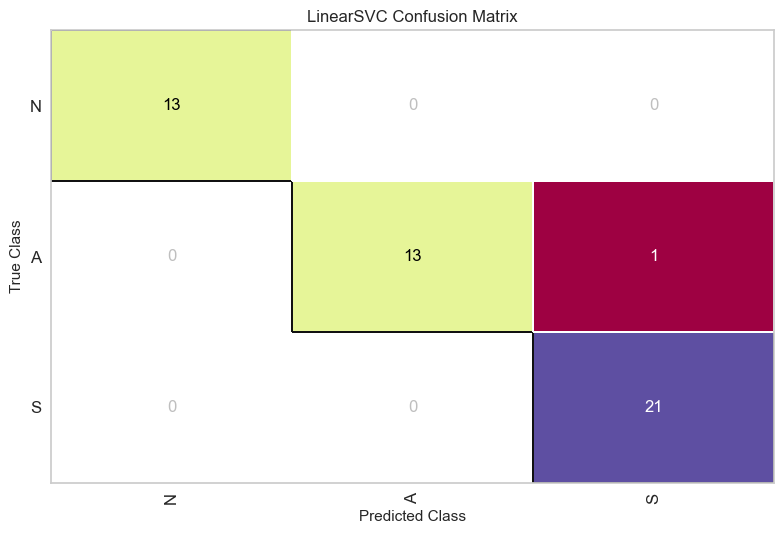

<Figure size 800x550 with 0 Axes>

In [32]:
from yellowbrick.classifier import confusion_matrix
confusion_matrix(
    LinearSVC (), x_train, y_train, x_test, y_test,
    classes=['N', 'A', 'S'], cmap='Spectral'
) 
plt.savefig('CM_LinearSVC.png')
plt.tight_layout();

In [33]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
confusion_matrix(y_test, p)

array([[13,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 21]], dtype=int64)

In [34]:
#Generación de soporte

print(metrics.classification_report(y_test, p, digits = 4))

              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000        13
         1.0     1.0000    0.9286    0.9630        14
         2.0     0.9545    1.0000    0.9767        21

    accuracy                         0.9792        48
   macro avg     0.9848    0.9762    0.9799        48
weighted avg     0.9801    0.9792    0.9790        48



<font color=#AD85E9 size=8>**Neural networks (Redes Neuronales)**



In [35]:
from sklearn.neural_network import MLPClassifier
x_train, x_test, y_train, y_test = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size=0.8, random_state=rss[np.argmax(exs)], shuffle= True)
ann = MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.01, solver = 'lbfgs', max_iter = 5000, random_state = 123)
ann.fit(X=x_train, y=y_train)

MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.01,
              max_iter=5000, random_state=123, solver='lbfgs')

In [36]:
#Predicción con base a las variables ya entrenadas

y_pred = ann.predict(x_test)
score = ann.score(x_test, y_test)
score

0.8958333333333334

In [37]:
#Matriz de confusion para saber donde acierta y donde falla

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
confusion_matrix(y_test, y_pred)

array([[11,  2,  0],
       [ 1, 12,  1],
       [ 0,  1, 20]], dtype=int64)

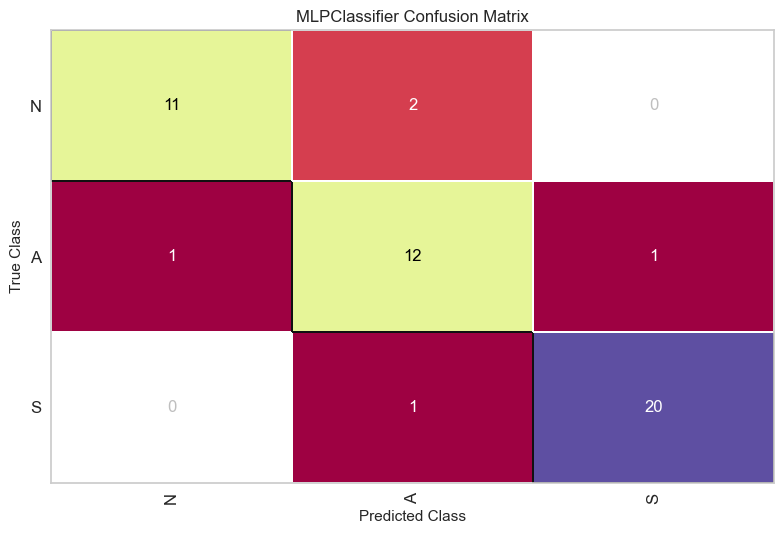

              precision    recall  f1-score   support

         0.0     0.9167    0.8462    0.8800        13
         1.0     0.8000    0.8571    0.8276        14
         2.0     0.9524    0.9524    0.9524        21

    accuracy                         0.8958        48
   macro avg     0.8897    0.8852    0.8867        48
weighted avg     0.8983    0.8958    0.8964        48



<Figure size 800x550 with 0 Axes>

In [38]:
from yellowbrick.classifier import confusion_matrix

confusion_matrix(
    MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.01, solver = 'lbfgs', max_iter = 5000, random_state = 123),
    x_train, y_train, x_test, y_test,
    classes=['N', 'A', 'S'], cmap='Spectral'
) 
plt.savefig('CM_MLPclassifier_neural networks.png')
plt.tight_layout();

#Generación de soporte

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, digits = 4))

# SAVING THE MODELS

In [39]:
#Guardar el modelo entrenado. 
# Primero el SVC y segundo las redes Neuronales

import sklearn.externals
import joblib

File_svc = "Mod_chagas_svc.pkl"
joblib.dump(svc1, File_svc)


['Mod_chagas_svc.pkl']

In [40]:
File_ann = "Mod_chagas.pkl"
joblib.dump(ann, File_ann)

['Mod_chagas.pkl']

In [41]:
Model_svc =joblib.load('Mod_chagas.pkl')

In [42]:
Model_svc

MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.01,
              max_iter=5000, random_state=123, solver='lbfgs')

In [43]:
Model_red = joblib.load('Mod_chagas_svc.pkl')
Model_red

SVC(C=40, random_state=123)

 <font color=#CF3BD6 size=8>**Classifiers**

 <font color=#E188CC size=6>**Random Forest**
    

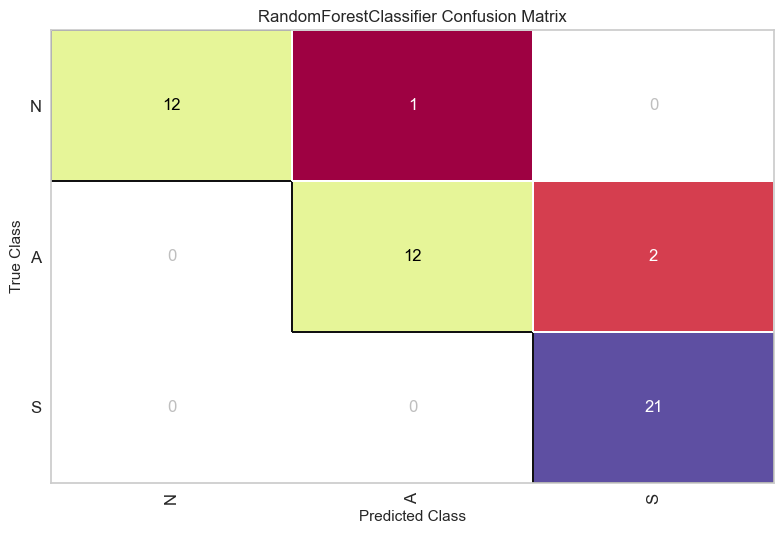

              precision    recall  f1-score   support

         0.0     1.0000    0.9231    0.9600        13
         1.0     0.9231    0.8571    0.8889        14
         2.0     0.9130    1.0000    0.9545        21

    accuracy                         0.9375        48
   macro avg     0.9454    0.9267    0.9345        48
weighted avg     0.9395    0.9375    0.9369        48



<Figure size 800x550 with 0 Axes>

In [44]:
from yellowbrick.classifier import confusion_matrix

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=90)
rfc.fit(x_train, y_train)

confusion_matrix(
   RandomForestClassifier(random_state = 90),
    x_train, y_train, x_test, y_test,
    classes=['N', 'A', 'S'], cmap='Spectral'
) 

plt.savefig('CM_RandomForest.png')
plt.tight_layout();

#Predicción con base a las variables ya entrenadas

y_pred1 = rfc.predict(x_test)


#Generación de soporte

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred1, digits = 4))

 <font color=#973BD6 size=6>**Stochastic Gradient Descent-Classifier (SGDClassifier)**

In [78]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(max_iter=100, tol=1e-3)
sgdc.fit(x_train, y_train)

y_pred_sgdc = sgdc.predict(x_test)
score_sgdc = sgdc.score(x_test, y_test)
score_sgdc

0.9583333333333334

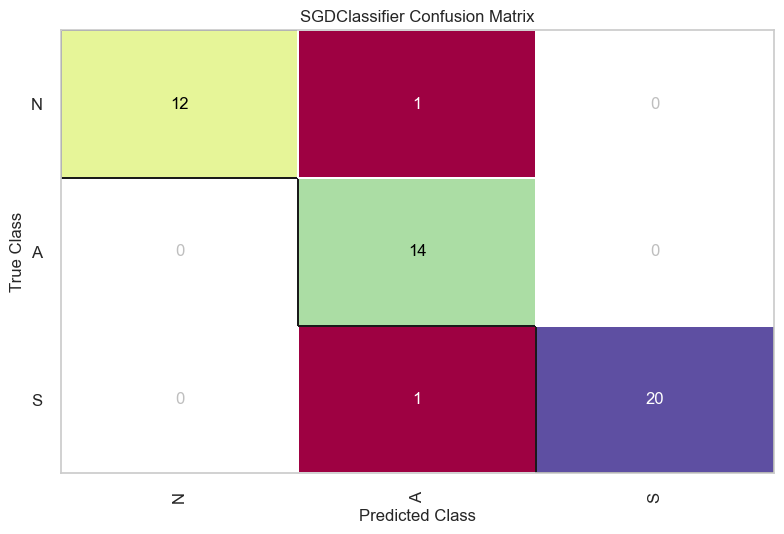

<Figure size 800x550 with 0 Axes>

              precision    recall  f1-score   support

         0.0     1.0000    0.9231    0.9600        13
         1.0     0.8750    1.0000    0.9333        14
         2.0     1.0000    0.9524    0.9756        21

    accuracy                         0.9583        48
   macro avg     0.9583    0.9585    0.9563        48
weighted avg     0.9635    0.9583    0.9591        48



In [79]:
from yellowbrick.classifier import confusion_matrix

visualizer = confusion_matrix(
    sgdc, x_train, y_train, x_test, y_test,
    classes=['N', 'A', 'S'], cmap='Spectral'
)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)

plt.savefig('sdg.png')
plt.tight_layout();
plt.show()

#Generación de soporte

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_sgdc, digits = 4))

 <font color=#E188CC size=6>**K-Nearest Neighbors(KNN)**

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

In [48]:
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

KNeighborsClassifier()

In [49]:
y_pred3 = knc.predict(x_test)
score_knc = knc.score(x_test, y_test)
score_knc

C:\Users\Yenny\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Yenny\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.8333333333333334

C:\Users\Yenny\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Yenny\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

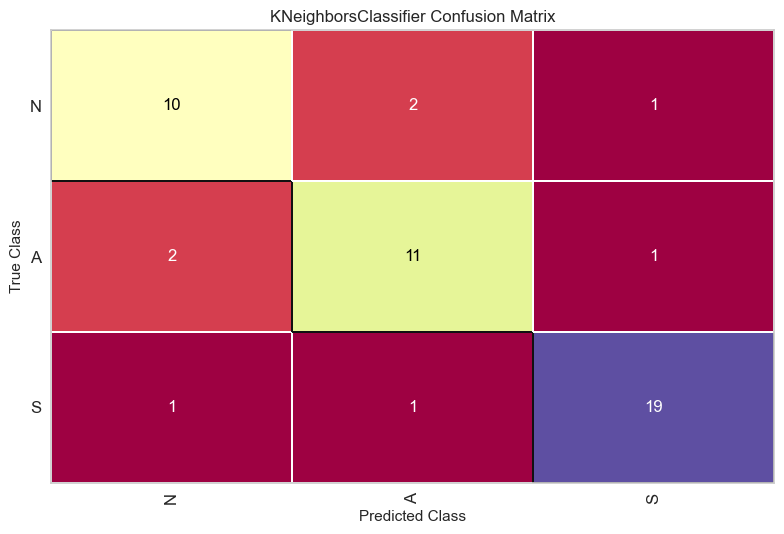

C:\Users\Yenny\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Yenny\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

<Figure size 800x550 with 0 Axes>

              precision    recall  f1-score   support

         0.0     0.7692    0.7692    0.7692        13
         1.0     0.7857    0.7857    0.7857        14
         2.0     0.9048    0.9048    0.9048        21

    accuracy                         0.8333        48
   macro avg     0.8199    0.8199    0.8199        48
weighted avg     0.8333    0.8333    0.8333        48



<Figure size 800x550 with 0 Axes>

In [50]:
from yellowbrick.classifier import confusion_matrix

visualizer = confusion_matrix(
    knc, x_train, y_train, x_test, y_test,
    classes=['N', 'A', 'S'], cmap='Spectral'
)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
plt.tight_layout();
plt.show()
plt.savefig('CM_KNN.png')

#Generación de soporte

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred3, digits = 4))

 <font color=#E188CC size=6>**Logistic Regression**

In [51]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')
lr.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [52]:
ypred_lr=lr.predict(x_test)
lr.score(x_test, y_test)
#print(classification_report(y_test,ypred))

0.9583333333333334

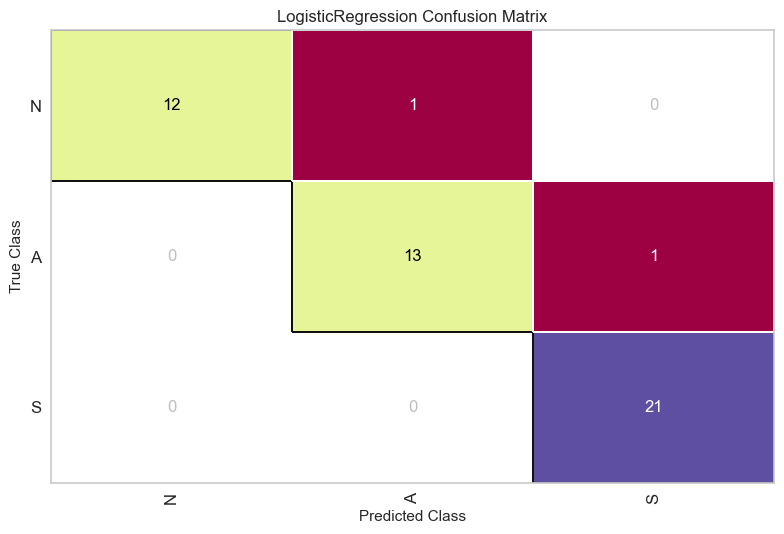

<Figure size 800x550 with 0 Axes>

              precision    recall  f1-score   support

         0.0     1.0000    0.9231    0.9600        13
         1.0     0.9286    0.9286    0.9286        14
         2.0     0.9545    1.0000    0.9767        21

    accuracy                         0.9583        48
   macro avg     0.9610    0.9505    0.9551        48
weighted avg     0.9593    0.9583    0.9582        48



In [53]:
from yellowbrick.classifier import confusion_matrix

visualizer = confusion_matrix(
    lr, x_train, y_train, x_test, y_test,
    classes=['N', 'A', 'S'], cmap='Spectral'
)


visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)

plt.savefig('CM_LogisticRegression.png')
plt.tight_layout();
plt.show()



#Generación de soporte

from sklearn import metrics
print(metrics.classification_report(y_test, ypred_lr, digits = 4))

 <font color=#C21292 size=6>**ExtraTrees Classifier**

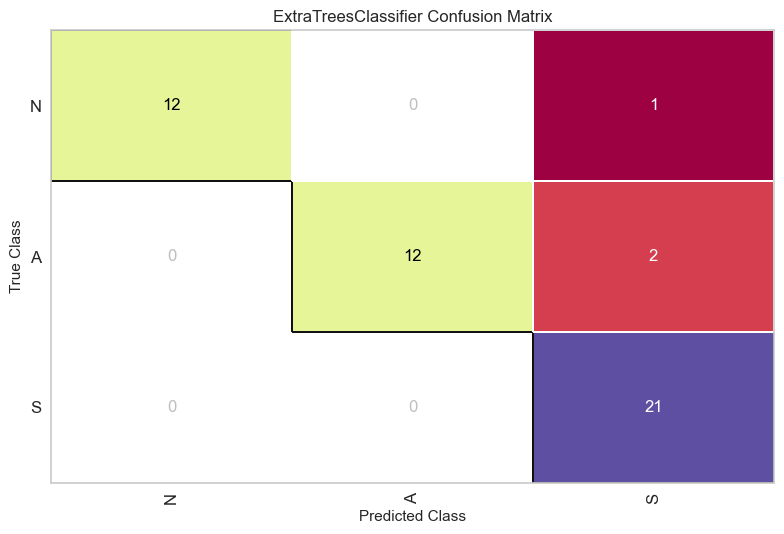

<Figure size 800x550 with 0 Axes>

              precision    recall  f1-score   support

         0.0     1.0000    0.9231    0.9600        13
         1.0     1.0000    0.8571    0.9231        14
         2.0     0.8750    1.0000    0.9333        21

    accuracy                         0.9375        48
   macro avg     0.9583    0.9267    0.9388        48
weighted avg     0.9453    0.9375    0.9376        48



<Figure size 800x550 with 0 Axes>

In [54]:
from sklearn.ensemble import ExtraTreesClassifier

T = ExtraTreesClassifier(n_estimators=300)
T.fit(x_train, y_train)

ypred_T=T.predict(x_test)

visualizer = confusion_matrix(
    T, x_train, y_train, x_test, y_test,
    classes=['N', 'A', 'S'], cmap='Spectral'
)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
plt.tight_layout();
plt.show()
plt.savefig('CM_ExtraTrees.png')

#Generación de soporte

from sklearn import metrics
print(metrics.classification_report(y_test, ypred_T, digits = 4))

 <font color=#E188CC size=6>**Comparation of the different Models and Quantifiers**

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier


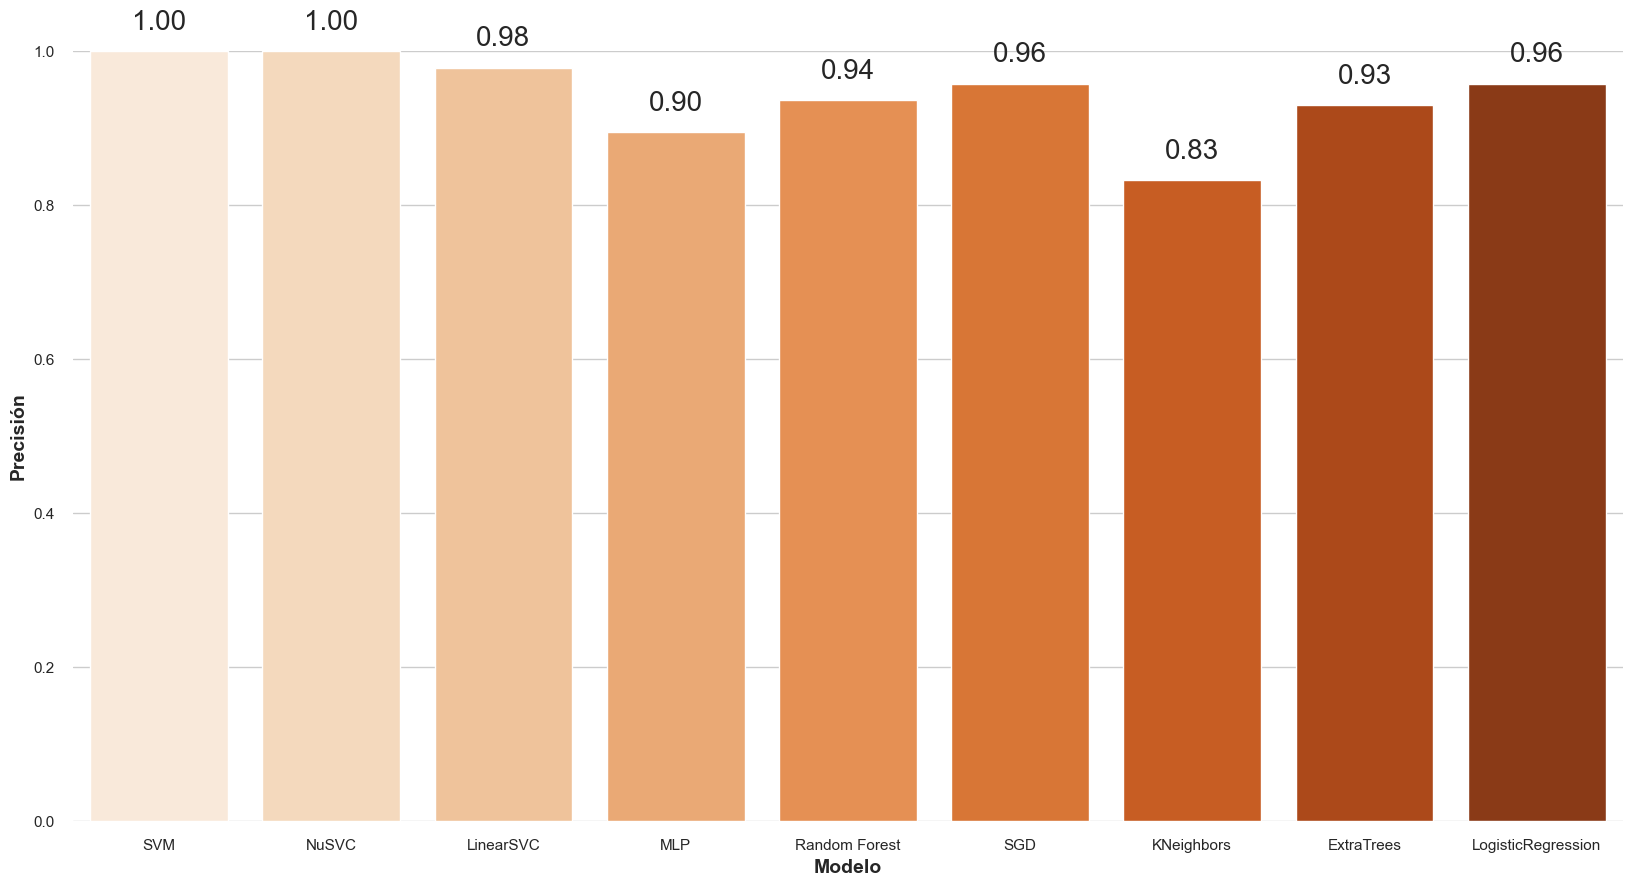

In [93]:
# Precisión de los modelos

model_names = ['SVM', 'NuSVC','LinearSVC', 'MLP','Random Forest', 'SGD', 'KNeighbors', 'ExtraTrees', 'LogisticRegression']
accuracies = [1, 1, 0.979, 0.895,0.937,0.958, 0.833,0.93,0.958 ]

# Establecer un estilo de gráfico "seaborn"
sns.set(style="whitegrid")

# Crear un gráfico de barras con un esquema de colores diferente
plt.figure(figsize=(20, 10))
bars = sns.barplot(x=model_names, y=accuracies, palette="Oranges")
plt.xlabel('Modelo', fontweight='bold', fontsize=14)
plt.ylabel('Precisión', fontweight='bold', fontsize=14)

plt.ylim(0, 1)  # Establece el rango del eje y entre 0 y 1 (100%)

# Mostrar las etiquetas de los valores en las barras
for bar, accuracy in zip(bars.patches, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, accuracy + 0.02, f'{accuracy:.2f}', ha='center', va='bottom', fontsize=20)


for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.savefig('model_accuracies.jpg', dpi=300, bbox_inches='tight')
plt.show()
